In [80]:
# 중복 제거
import os
from remove_duplicate import remove_duplicate

FN        = 'total.txt'
FN_UNDUP  = 'total_undup.txt'
SEP = '----------\n'

dirname = os.path.abspath('')
FN = os.path.join(dirname, FN)
FN_UNDUP = os.path.join(dirname, FN_UNDUP)

lines_without_duplicate, cnt_dup = remove_duplicate(FN, FN_UNDUP, SEP, overwrite=True)

len(lines): 11801
len(lines_nodup): 11801
no duplicate


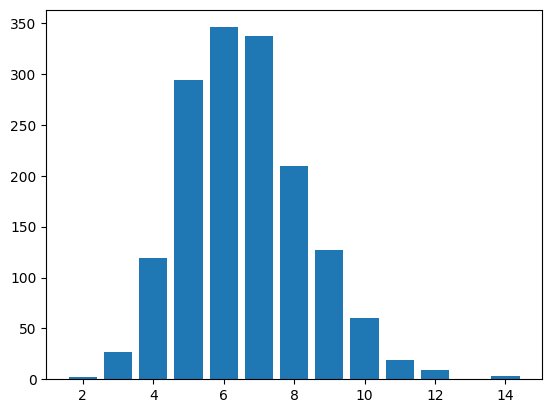

전체 문장 수: 10248
전체 초록 수: 1553
[초록 내 문장수  2]인 초록 개수: 2
[초록 내 문장수  3]인 초록 개수: 27
[초록 내 문장수  4]인 초록 개수: 119
[초록 내 문장수  5]인 초록 개수: 294
[초록 내 문장수  6]인 초록 개수: 346
[초록 내 문장수  7]인 초록 개수: 337
[초록 내 문장수  8]인 초록 개수: 210
[초록 내 문장수  9]인 초록 개수: 127
[초록 내 문장수 10]인 초록 개수: 60
[초록 내 문장수 11]인 초록 개수: 19
[초록 내 문장수 12]인 초록 개수: 9
[초록 내 문장수 14]인 초록 개수: 3


In [81]:
# 전체 문장 수 및
# 전체 초록 수 및
# 초록 별 문장 수 분포

from remove_duplicate import get_abstracts_without_duplicate
from collections import Counter
from matplotlib import pyplot as plt

abstracts, _ = get_abstracts_without_duplicate(lines_without_duplicate, SEP)

num_sentences = []
min_sentences_in_abs = 10
max_sentences_in_abs = 0
for abst in abstracts:
	num = len(abst) - 1
	if num > max_sentences_in_abs: max_sentences_in_abs = num
	elif num < min_sentences_in_abs: min_sentences_in_abs = num
	num_sentences.append(num) # except each seperator
counter = Counter(num_sentences)

plt.bar(counter.keys(), counter.values())
plt.show()

print("전체 문장 수:", sum(num_sentences))
print("전체 초록 수:", len(abstracts))
for k, v in sorted(counter.items()):
	print(f"[초록 내 문장수 {k:2}]인 초록 개수: {v}")

In [82]:
'''
	Reduce Tag
	ignore or replace tags

	FN_TOTAL format:
		Abstract
		Seperator
		Abstract
		Seperator
		...
	
	Abstract format:
		Sentence'\t'tag
		Sentence'\t'tag
		...
'''

from reduce_tag import count_tag, modes
from matplotlib import pyplot as plt

FN_ORGINAL = 'total.txt'
fn_dict = {mode:0 for mode in modes}
fn_dict['original'] = FN_ORGINAL
dirname = os.path.abspath('')
for mode, fn in fn_dict.items():
	if mode != 'original':
		fn = FN_ORGINAL.split('.')[0] + '_' + mode + '.txt'
	fn_dict[mode] = os.path.join(dirname, fn)

for fn in fn_dict.values():
	print(fn)

/workspace/paperassistant/backend/block_classifier/data/total.txt
/workspace/paperassistant/backend/block_classifier/data/total_ignore.txt
/workspace/paperassistant/backend/block_classifier/data/total_replace.txt
/workspace/paperassistant/backend/block_classifier/data/total_ignore-56.txt
/workspace/paperassistant/backend/block_classifier/data/total_replace-56.txt
/workspace/paperassistant/backend/block_classifier/data/total_ignore-5.txt


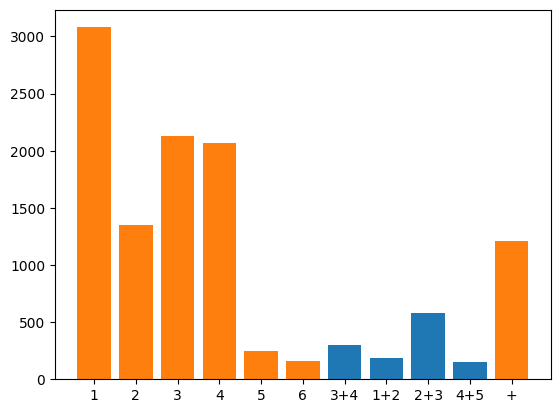

/workspace/paperassistant/backend/block_classifier/data/total.txt
original tag count: {'1': 3080, '2': 1348, '3': 2132, '4': 2067, '5': 246, '6': 163, '3+4': 297, '1+2': 185, '2+3': 582, '4+5': 148}
the number of lines: 10248

/workspace/paperassistant/backend/block_classifier/data/total_ignore.txt
reduced tag count: {'1': 3080, '2': 1348, '3': 2132, '4': 2067, '5': 246, '6': 163, '+': 1212}
the number of lines: 10248


In [83]:
# for ignore
# remove each sentence with '+' in tag
# 1+2, 2+3, 3+4, 4+5 -> + (to be removed)

MODE = 'ignore'
lines, tag_cnt_dict, tag_reduced_cnt_dict = count_tag(FN_ORGINAL, mode=MODE)
with open(fn_dict[MODE], 'w', encoding='utf-8') as wf:
	wf.writelines(lines)

plt.bar(tag_cnt_dict.keys(), tag_cnt_dict.values())
plt.bar(tag_reduced_cnt_dict.keys(), tag_reduced_cnt_dict.values())
plt.show()
print(fn_dict['original'])
print('original tag count:', tag_cnt_dict)
print('the number of lines:', sum(tag_cnt_dict.values()))
print()
print(fn_dict[MODE])
print('reduced tag count:', tag_reduced_cnt_dict)
print('the number of lines:', sum(tag_reduced_cnt_dict.values()))

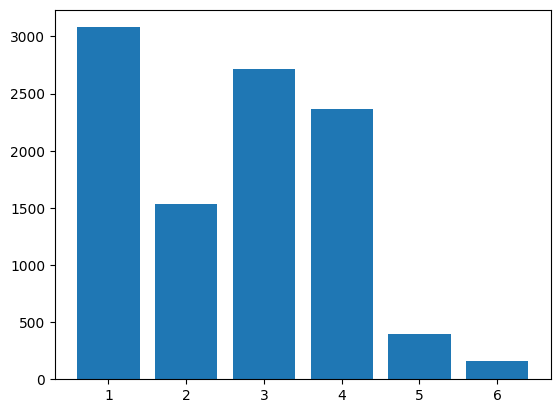

/workspace/paperassistant/backend/block_classifier/data/total_replace.txt
reduced tag count: {'1': 3080, '2': 1533, '3': 2714, '4': 2364, '5': 394, '6': 163}
the number of lines: 10248


In [84]:
# for replace
# replace each sentence with A+B tag with B tag.
# 1+2 -> 2
# 2+3 -> 3
# 3+4 -> 4
# 4+5 -> 5

MODE = 'replace'
lines, _, tag_reduced_cnt_dict = count_tag(FN_ORGINAL, mode=MODE)
with open(fn_dict[MODE], 'w', encoding='utf-8') as wf:
	wf.writelines(lines)
	
plt.bar(tag_reduced_cnt_dict.keys(), tag_reduced_cnt_dict.values())
plt.show()
print(fn_dict[MODE])
print('reduced tag count:', tag_reduced_cnt_dict)
print('the number of lines:', sum(tag_reduced_cnt_dict.values()))

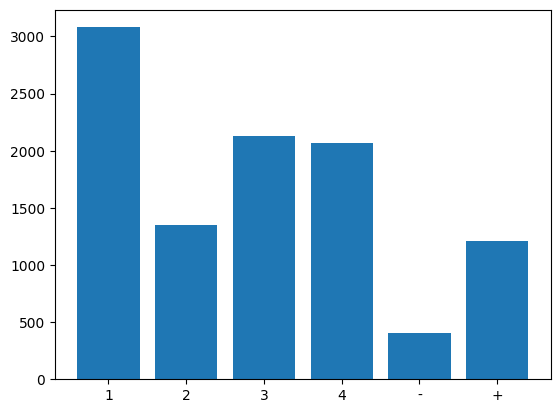

/workspace/paperassistant/backend/block_classifier/data/total_ignore-56.txt
reduced tag count: {'1': 3080, '2': 1348, '3': 2132, '4': 2067, '-': 409, '+': 1212}
the number of lines: 10248


In [85]:
# for ignore-56
# remove each sentence with '+' in tag and '5', '6' tags
# 1+2, 2+3, 3+4, 4+5 -> + (to be removed)
# 5, 6 -> - (to be removed)

MODE = 'ignore-56'
lines, _, tag_reduced_cnt_dict = count_tag(FN_ORGINAL, mode=MODE)
with open(fn_dict[MODE], 'w', encoding='utf-8') as wf:
	wf.writelines(lines)

plt.bar(tag_reduced_cnt_dict.keys(), tag_reduced_cnt_dict.values())
plt.show()
print(fn_dict[MODE])
print('reduced tag count:', tag_reduced_cnt_dict)
print('the number of lines:', sum(tag_reduced_cnt_dict.values()))

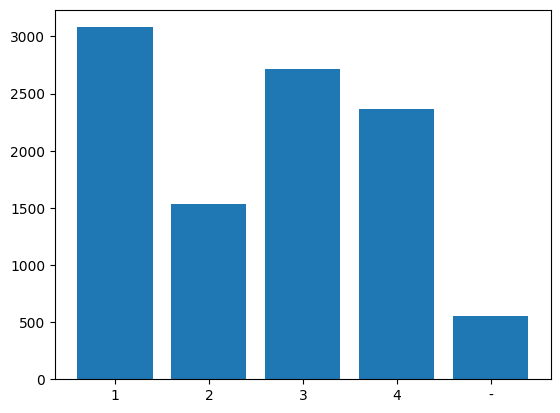

/workspace/paperassistant/backend/block_classifier/data/total_replace-56.txt
reduced tag count: {'1': 3080, '2': 1533, '3': 2714, '4': 2364, '-': 557}
the number of lines: 10248


In [86]:
# for replace-56
# replace each sentence with A+B tag with B tag and remove each sentence with '5' or '6' tag.
# 1+2 -> 2
# 2+3 -> 3
# 3+4 -> 4
# 4+5, 5, 6 -> - (to be removed)

MODE = 'replace-56'
lines, _, tag_reduced_cnt_dict = count_tag(FN_ORGINAL, mode=MODE)
with open(fn_dict[MODE], 'w', encoding='utf-8') as wf:
	wf.writelines(lines)

plt.bar(tag_reduced_cnt_dict.keys(), tag_reduced_cnt_dict.values())
plt.show()
print(fn_dict[MODE])
print('reduced tag count:', tag_reduced_cnt_dict)
print('the number of lines:', sum(tag_reduced_cnt_dict.values()))

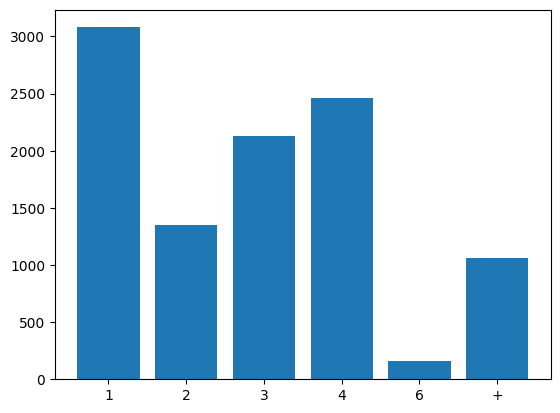

/workspace/paperassistant/backend/block_classifier/data/total_ignore-5.txt
reduced tag count: {'1': 3080, '2': 1348, '3': 2132, '4': 2461, '6': 163, '+': 1064}
the number of lines: 10248


In [87]:
# for ignore-5
# remove each sentence with '+' in tag and replace each sentence with '5' in tag with '4'
# 1+2, 2+3, 3+4 -> + (to be removed)
# 4+5, 5 -> 4

MODE = 'ignore-5'
lines, _, tag_reduced_cnt_dict = count_tag(FN_ORGINAL, mode=MODE)
with open(fn_dict[MODE], 'w', encoding='utf-8') as wf:
	wf.writelines(lines)

plt.bar(tag_reduced_cnt_dict.keys(), tag_reduced_cnt_dict.values())
plt.show()
print(fn_dict[MODE])
print('reduced tag count:', tag_reduced_cnt_dict)
print('the number of lines:', sum(tag_reduced_cnt_dict.values()))

In [88]:
# 수정된 파일에서 대치된 +, - 태그를 가진 문장을 제거

from reduce_tag import remove_useless_tags
from reform_total import reform_abstract, get_reformed_filename

fn_reformed_dict = dict()

for fn_base, fn in fn_dict.items():
	# remove lines with useless tag from the file (+, -)
	# and write the file in itself
	remove_useless_tags(fn, remove_unit='line')

	# generate reformed abstract
	fn_reformed = reform_abstract(fn)
	fn_reformed_base = fn_base + '_reformed'
	fn_reformed_dict[fn_reformed_base] = fn_reformed

fn_dict.update(fn_reformed_dict)

for key, fn in fn_dict.items():
	key = "'" + key + "'"
	print(f"{key:<21}: '{fn}'")

size of total.txt : 11801
size of total_reformed.txt : 11801
size of total_ignore.txt : 10589
size of total_ignore_reformed.txt : 10589
size of total_replace.txt : 11801
size of total_replace_reformed.txt : 11801
size of total_ignore-56.txt : 10180
size of total_ignore-56_reformed.txt : 10180
size of total_replace-56.txt : 11244
size of total_replace-56_reformed.txt : 11244
size of total_ignore-5.txt : 10737
size of total_ignore-5_reformed.txt : 10737
'original'           : '/workspace/paperassistant/backend/block_classifier/data/total.txt'
'ignore'             : '/workspace/paperassistant/backend/block_classifier/data/total_ignore.txt'
'replace'            : '/workspace/paperassistant/backend/block_classifier/data/total_replace.txt'
'ignore-56'          : '/workspace/paperassistant/backend/block_classifier/data/total_ignore-56.txt'
'replace-56'         : '/workspace/paperassistant/backend/block_classifier/data/total_replace-56.txt'
'ignore-5'           : '/workspace/paperassistant/bac

In [89]:
# 각각의 태그 조작 데이터셋을 train, valid, test로 split

from data_split import remove_seperator, split_lines

for fn in fn_dict.values():
	# remove seperators
	fn_nosep = remove_seperator(fn, shuffle=True)

	# split total into train, valid, test
	split_lines(fn_nosep, train_ratio=0.8, shuffle=True)

size of total.txt : 11801
size of total_nosep.txt : 10248
size of train.txt : 8198
size of valid.txt : 1024
size of test.txt : 1026
size of total_ignore.txt : 10589
size of total_ignore_nosep.txt : 9036
size of train_ignore.txt : 7228
size of valid_ignore.txt : 903
size of test_ignore.txt : 905
size of total_replace.txt : 11801
size of total_replace_nosep.txt : 10248
size of train_replace.txt : 8198
size of valid_replace.txt : 1024
size of test_replace.txt : 1026
size of total_ignore-56.txt : 10180
size of total_ignore-56_nosep.txt : 8627
size of train_ignore-56.txt : 6901
size of valid_ignore-56.txt : 862
size of test_ignore-56.txt : 864
size of total_replace-56.txt : 11244
size of total_replace-56_nosep.txt : 9691
size of train_replace-56.txt : 7752
size of valid_replace-56.txt : 969
size of test_replace-56.txt : 970
size of total_ignore-5.txt : 10737
size of total_ignore-5_nosep.txt : 9184
size of train_ignore-5.txt : 7347
size of valid_ignore-5.txt : 918
size of test_ignore-5.txt :